In [125]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
print("Hello World")



import io
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')



Hello World


In [264]:
#Read in raw data
df_base = pd.read_csv("data/USWNT.csv")

#print  (list(df_base.keys())) #Show the available dictionary keys

print("\n".join(list(df_base.keys())))

#df.head(10)


Game ID
Outcome
Team
GP
MP
GS
Goals
Shots
Shots.per.90
Shot.Accuracy
Shot.GK.Stop
Shot.Def.Stop
Shot.Miss
Shots.Blocked
Shot.Pressed
Pct.Shots.Pressed
A6.Shots
A18.Shots
A3L.Shots
A3C.Shots
A3R.Shots
Far.Shots
Assists
Key.Passes
Key.Assists
Second.Assists
Assists.per.90
Key.Passes.per.90
Big.Chances
Big.Chances.per.90
BC.Scored
BC.Conversion.Pct
BC.SOG
BC.Shot.Miss
BC.Dispossess
BC.Created
BC.Lost
Pass.Comp
Pass.Att
Pass.Att.per.90
Pass.Comp.Pct
opPass.Comp
opPass.Att
opPass.Att.per.90
opPass.Comp.Pct
opPPass.Comp
opPPass.Att
opPPass.Att.per.90
opPPass.Comp.Pct
Pct.opPass.Pressed
rFreq.Pass.Fwd
rFreq.Pass.Side
rFreq.Pass.Back
fwPass.Comp
fwPass.Att
fwPass.Att.per.90
fwPass.Comp.Pct
sPass.Comp
sPass.Att
sPass.Att.per.90
sPass.Comp.Pct
bPass.Comp
bPass.Att
bPass.Att.per.90
bPass.Comp.Pct
rFreq.A3.Passes
rFreq.M3.Passes
rFreq.D3.Passes
A3Pass.Comp
A3Pass.Att
A3Pass.Att.per.90
A3Pass.Comp.Pct
M3Pass.Comp
M3Pass.Att
M3Pass.Att.per.90
M3Pass.Comp.Pct
D3Pass.Comp
D3Pass.Att
D3Pass.Att.per.90


In [276]:
#Isolate the variables we want to look at and do needed transformations

df = df_base[[
          "Shots"
          ,"Big.Chances"
          ,"Pass.Comp"
          ,"Corner.Kicks.Taken"
          ,"GK.SOG.Faced"
          ,"CK.Comp.Pct"
             
          ,"Outcome" ]]

#df = df_base[["Outcome","Shots", "Shot.Accuracy", "Shot.GK.Stop", "Shot.Def.Stop", "Shot.Pressed", "Pct.Shots.Pressed", "Assists", "Key.Passes", "Key.Assists", "Big.Chances", "BC.Conversion.Pct", "BC.SOG", "Pass.Comp", "Pass.Att", "Pass.Comp.Pct", "Cross.Comp.Pct", "Through.Comp.Pct", "Throw.In.Comp.Pct", "CK.Comp.Pct", "FK.Pass.Att", "FK.Shot", "Take.Ons", "TO.Win.Pct", "Dispossessed", "Lost.Touches", "Aerial.Duels", "AD.Win.Pct", "Tackles", "Recoveries", "Interceptions", "Blocks", "Ball.Shields", "Yellow.Cards", "Red.Cards", "Saves", "Goals.Allowed", "BC.SOG.Faced", "BC.Saves", "High.Balls.Faced", "HB.Won", "HB.Lost", "Crosses.Faced", "Corner.Kicks.Faced", "Free.Kicks.Faced", "Smothers.Won", "Smothers.Lost", "GK.Overall.Pass.Comp.Pct", "GK.Throw.Comp.Pct", "GK.Drop.Kick.Comp.Pct", "GKFK.Comp.Pct"]]
df = df_base[["Outcome", "Goals","Pass.Comp", "Pass.Att", "Goals.Allowed", "Shots", "Assists", "Pass.Comp.Pct", "Big.Chances", "Key.Passes", "Take.Ons", "BC.SOG.Faced", "Shot.Pressed", "AD.Win.Pct", "GK.Overall.Pass.Comp.Pct"]]


#print(df['CK.Comp.Pct'].head(10))
#df['CK.Comp.Pct'] = df['CK.Comp.Pct'].convert_objects(convert_numeric=True)
#pd.to_numeric(df['CK.Comp.Pct'])
#print(df['CK.Comp.Pct'].head(10))
print  (list(df.keys()))

['Outcome', 'Pass.Comp', 'Pass.Att', 'Goals.Allowed', 'Shots', 'Assists', 'Pass.Comp.Pct', 'Big.Chances', 'Key.Passes', 'Take.Ons', 'BC.SOG.Faced', 'Shot.Pressed', 'AD.Win.Pct', 'GK.Overall.Pass.Comp.Pct']


In [277]:
#Produce a correlecation matrix for exploration
corr = df.corr()
corr.style.background_gradient().set_precision(2)



,Outcome,Pass.Comp,Pass.Att,Goals.Allowed,Shots,Assists,Pass.Comp.Pct,Big.Chances,Key.Passes,Take.Ons,BC.SOG.Faced,Shot.Pressed,AD.Win.Pct,GK.Overall.Pass.Comp.Pct
Outcome,1,0.7,0.7,-0.69,0.66,0.66,0.64,0.63,0.62,0.61,-0.61,0.6,0.6,0.6
Pass.Comp,0.7,1,0.99,-0.55,0.73,0.57,0.92,0.6,0.59,0.62,-0.55,0.65,0.64,0.77
Pass.Att,0.7,0.99,1,-0.57,0.74,0.55,0.88,0.59,0.59,0.61,-0.57,0.68,0.64,0.75
Goals.Allowed,-0.69,-0.55,-0.57,1,-0.45,-0.38,-0.51,-0.39,-0.37,-0.41,0.74,-0.36,-0.48,-0.43
Shots,0.66,0.73,0.74,-0.45,1,0.71,0.59,0.74,0.65,0.64,-0.53,0.91,0.63,0.68
Assists,0.66,0.57,0.55,-0.38,0.71,1,0.51,0.75,0.67,0.53,-0.33,0.58,0.52,0.54
Pass.Comp.Pct,0.64,0.92,0.88,-0.51,0.59,0.51,1,0.53,0.49,0.52,-0.48,0.48,0.59,0.71
Big.Chances,0.63,0.6,0.59,-0.39,0.74,0.75,0.53,1,0.8,0.59,-0.4,0.58,0.59,0.6
Key.Passes,0.62,0.59,0.59,-0.37,0.65,0.67,0.49,0.8,1,0.47,-0.36,0.54,0.5,0.57
Take.Ons,0.61,0.62,0.61,-0.41,0.64,0.53,0.52,0.59,0.47,1,-0.4,0.55,0.57,0.62


In [278]:
#Print just the ranking of factors as they relate to outcome
corr_list=corr.unstack().sort_values().drop_duplicates()
#print  (list(corr_list.keys()))

corrs = df.corr().values
ranks = (df.columns[:-1][-corrs[:-1,-1].argsort()]).tolist()

#print (corrs)
print(ranks) #Print them in order. Also a nice way to get a properly formatted vector of our factors to pass around for labels.
#corr_list[corr_list['column_name'] == "Outcome"]

['Goals.Allowed', 'BC.SOG.Faced', 'Key.Passes', 'Assists', 'Pass.Att', 'Pass.Comp.Pct', 'Outcome', 'Shots', 'Pass.Comp', 'Take.Ons', 'Big.Chances', 'Shot.Pressed', 'AD.Win.Pct']


In [289]:
#df = df_base[["Outcome","Shots", "Shot.Accuracy", "Shot.GK.Stop", "Shot.Def.Stop", "Shot.Pressed", "Pct.Shots.Pressed", "Assists", "Key.Passes", "Key.Assists", "Big.Chances", "BC.Conversion.Pct", "BC.SOG", "Pass.Comp", "Pass.Att", "Pass.Comp.Pct", "Cross.Comp.Pct", "Through.Comp.Pct", "Throw.In.Comp.Pct", "CK.Comp.Pct", "FK.Pass.Att", "FK.Shot", "Take.Ons", "TO.Win.Pct", "Dispossessed", "Lost.Touches", "Aerial.Duels", "AD.Win.Pct", "Tackles", "Recoveries", "Interceptions", "Blocks", "Ball.Shields", "Yellow.Cards", "Red.Cards", "Saves", "Goals.Allowed", "BC.SOG.Faced", "BC.Saves", "High.Balls.Faced", "HB.Won", "HB.Lost", "Crosses.Faced", "Corner.Kicks.Faced", "Free.Kicks.Faced", "Smothers.Won", "Smothers.Lost", "GK.Overall.Pass.Comp.Pct", "GK.Throw.Comp.Pct", "GK.Drop.Kick.Comp.Pct", "GKFK.Comp.Pct"]]
df = df_base[["Outcome", "Shots", "GK.SOG.Faced","Assists", "Pass.Comp.Pct", "Big.Chances", "Key.Passes", "Take.Ons", "AD.Win.Pct", "GK.Overall.Pass.Comp.Pct"]]
df = df.dropna()
#Produce a correlecation matrix for exploration
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,Outcome,Shots,GK.SOG.Faced,Assists,Pass.Comp.Pct,Big.Chances,Key.Passes,Take.Ons,AD.Win.Pct,GK.Overall.Pass.Comp.Pct
Outcome,1,0.66,-0.64,0.66,0.64,0.63,0.62,0.61,0.6,0.6
Shots,0.66,1,-0.7,0.71,0.69,0.81,0.63,0.77,0.59,0.77
GK.SOG.Faced,-0.64,-0.7,1,-0.47,-0.69,-0.56,-0.57,-0.58,-0.55,-0.64
Assists,0.66,0.71,-0.47,1,0.53,0.75,0.61,0.56,0.48,0.59
Pass.Comp.Pct,0.64,0.69,-0.69,0.53,1,0.53,0.52,0.53,0.58,0.77
Big.Chances,0.63,0.81,-0.56,0.75,0.53,1,0.73,0.58,0.59,0.63
Key.Passes,0.62,0.63,-0.57,0.61,0.52,0.73,1,0.43,0.43,0.59
Take.Ons,0.61,0.77,-0.58,0.56,0.53,0.58,0.43,1,0.53,0.65
AD.Win.Pct,0.6,0.59,-0.55,0.48,0.58,0.59,0.43,0.53,1,0.67
GK.Overall.Pass.Comp.Pct,0.6,0.77,-0.64,0.59,0.77,0.63,0.59,0.65,0.67,1


In [299]:
from sklearn.model_selection import train_test_split

#Create training sets. Eventually we need to split our data into train and test.
y=df[["Outcome"]].values.ravel() #This converts us from a dataframe column to a 1d vector because that's what the model fit seems to want.
X=df[df.columns[:-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


#print(y_train.dtypes)

#print(x_train.dtypes)
#print(x_train.dtypes)

#print(x_train.values.ravel())
#print(type(x_train.values))

In [291]:
print(df)

    Outcome  Shots  GK.SOG.Faced  Assists  Pass.Comp.Pct  Big.Chances  \
0       2.0   19.0           0.0      3.0       0.870968          5.0   
1       0.0    0.0          12.0      0.0       0.783099          0.0   
2       2.0    7.0           1.0      2.0       0.791932          1.0   
3       0.0    2.0           3.0      0.0       0.697531          0.0   
4       2.0   19.0           0.0      4.0       0.855442          7.0   
5       0.0    0.0          12.0      0.0       0.552448          0.0   
6       2.0   29.0           0.0      6.0       0.847706          7.0   
7       0.0    1.0          16.0      0.0       0.537634          0.0   
8       2.0   14.0           1.0      0.0       0.853414          1.0   
9       0.0    2.0           5.0      0.0       0.577889          0.0   
10      2.0    4.0           5.0      0.0       0.808017          0.0   
11      0.0   10.0           2.0      0.0       0.760417          1.0   
12      1.0   14.0           2.0      0.0       0.8

In [300]:
# C=1e12 is effectively no regularization - see https://github.com/scikit-learn/scikit-learn/issues/6738
clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
#clf.fit(df['Grain size (mm)'].values.reshape(-1, 1), df['Spiders'])

# Train the model using the training sets
clf.fit(X_train, y_train)

print(clf.intercept_, clf.coef_)

print(clf.score(X_test,y_test))

[ 3.41234634 10.15751991 -1.27397267] [[-1.51795349e+01  5.49290844e-02  3.71554761e-01 -1.97090824e+00
   1.66723053e+00  3.58628237e-01 -1.56237147e+00  5.01593905e-02
   5.00291592e-01]
 [ 3.05658889e+00  4.66861742e-01 -7.27127239e-02 -3.85980397e+00
  -1.99288247e+01 -1.10426841e+00  4.75101404e-01 -1.98278304e-02
   6.59240749e-01]
 [ 1.53350511e+01 -6.62717352e-01 -3.15924249e+00  7.29717993e+00
   4.96391780e-01  9.54245829e-01 -1.56208752e+00 -3.12531015e-01
   7.72356427e-01]]
0.9166666666666666


In [293]:
#This is a null version of the fit. I don't know the difference betweent this and normal
        #To test if Grain size is a significant factor, we use the likelihood ratio test.
        #We calculate the likelihood of the model with the grain size (the alternative model):
clf0 = log_reg_null_model(df['Outcome'])

print(clf0)
print(clf0.intercept_, clf0.coef_)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
[-0.51081119 -1.098611   -0.51081119] [[0.]
 [0.]
 [0.]]


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

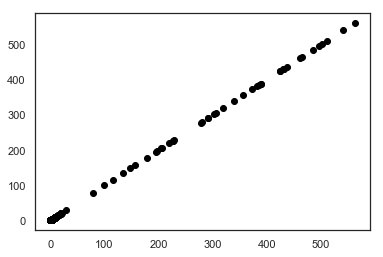

In [256]:
#This trys to make a chart of the regression. Not sure if it works with multiple x.
#plot_log_reg(x='Grain size (mm)', y='Spiders', data=df, clf=clf, xmin=0, xmax=1.5);

plot_log_reg(x=['Pass.Comp', 'Big.Chances', 'Corner.Kicks.Taken', 'CK.Comp.Pct', 'Shots', 'GK.SOG.Faced'], y='Outcome', data=df, clf=clf, xmin=0, xmax=1.5);




In [126]:
#df = pd.read_csv("NSDUH-2016-DS0001-bndl-data-tsv/NSDUH_2016_Tab.tsv",sep='\t')



data = """Grain size (mm)	Spiders
0.245	absent
0.247	absent
0.285	present
0.299	present
0.327	present
0.347	present
0.356	absent
0.36	present
0.363	absent
0.364	present
0.398	absent
0.4	present
0.409	absent
0.421	present
0.432	absent
0.473	present
0.509	present
0.529	present
0.561	absent
0.569	absent
0.594	present
0.638	present
0.656	present
0.816	present
0.853	present
0.938	present
1.036	present
1.045	present
"""

df = pd.read_table(io.StringIO(data))
#df = df.assign(SpiderPresent=(df.Spiders == 'present'))
df = df.assign(SpiderPresent=(df.Spiders))
df = df.assign(SpiderTF=(df.Spiders=='present'))
#df.Spiders_f = df.Spiders == 'present'
#df.Spiders_tf = df.Spiders == 'present'
print  (list(df.keys())) #Show the available dictionary keys


from sklearn.preprocessing import LabelEncoder
#print(df[:,1])
#X = df[:, 0:4]

#print(df.get('Spiders'))

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(df.Spiders)
encoded_y = label_encoder.transform(df.Spiders)
df.Spiders = encoded_y
print(encoded_y)


['Grain size (mm)', 'Spiders', 'SpiderPresent', 'SpiderTF']
[0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1]


In [127]:
df.head(10)
#df1.head(10)

#print(df.Spiders)

,Grain size (mm),Spiders,SpiderPresent,SpiderTF
0,0.245,0,absent,False
1,0.247,0,absent,False
2,0.285,1,present,True
3,0.299,1,present,True
4,0.327,1,present,True
5,0.347,1,present,True
6,0.356,0,absent,False
7,0.360,1,present,True
8,0.363,0,absent,False
9,0.364,1,present,True


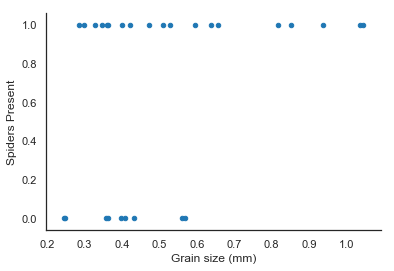

In [128]:
ax=df.plot.scatter('Grain size (mm)', 'Spiders')


#fig=plt.figure()
#ax=fig.add_subplot("spiders")

#ax.plot(df["Grain size (mm)", "Spiders"])

#plt(.)ylabel('Spiders present?')
ax.set_ylabel('Spiders Present')

sns.despine()


In [129]:
import sklearn.linear_model

In [130]:
print(df['Grain size (mm)'].values.reshape(-1, 1))


[[0.245]
 [0.247]
 [0.285]
 [0.299]
 [0.327]
 [0.347]
 [0.356]
 [0.36 ]
 [0.363]
 [0.364]
 [0.398]
 [0.4  ]
 [0.409]
 [0.421]
 [0.432]
 [0.473]
 [0.509]
 [0.529]
 [0.561]
 [0.569]
 [0.594]
 [0.638]
 [0.656]
 [0.816]
 [0.853]
 [0.938]
 [1.036]
 [1.045]]


In [246]:
# C=1e12 is effectively no regularization - see https://github.com/scikit-learn/scikit-learn/issues/6738
clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(df['Grain size (mm)'].values.reshape(-1, 1), df['Spiders'])
print(clf.intercept_, clf.coef_)

KeyError: 'Grain size (mm)'

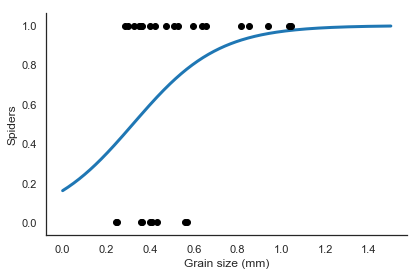

In [132]:

def plot_log_reg(x, y, data, clf, xmin=None, xmax=None, alpha=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
        
    ax.scatter(data[x], data[y], color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax, 300)

    loss = scipy.special.expit(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    fig.tight_layout()
    sns.despine()
    return fig, ax

plot_log_reg(x='Grain size (mm)', y='Spiders', data=df, clf=clf, xmin=0, xmax=1.5);


In [136]:


#ax=plt.subplots()



In [137]:
#To test if Grain size is a significant factor, we use the likelihood ratio test.

#We calculate the likelihood of the model with the grain size (the alternative model):

def log_reg_null_model(y):
    clf = sklearn.linear_model.LogisticRegression(C=1e12)
    clf.fit(np.zeros_like(y).reshape(-1, 1), y)
    return clf

clf0 = log_reg_null_model(df['Spiders'])

print(clf0)



LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [138]:


#The likelihood ratio test operates by calculating the test statistic $D$ from the likelihoods of the null and alternative models: $$ D = -2 \log{ \frac{L(H_0)}{L(H_1)} } $$ The test statistic is then approximately chisquare distributed.

#scikit-learn has a log-loss function that can help us do that. The log-loss is defined as the negative log-likelihood, so we can rewrite: $$ D = 2 (-\log{L(H_0)} + \log{L(H_1)}) \Rightarrow \\ D = 2 (logloss(H_0) - logloss(H_1)) $$

import sklearn.metrics

def log_reg_lik_ratio_test(X, Y, clf0, clf1, df=1):
    if X.ndim == 1:
        X = X.values.reshape(-1, 1)
    y_prob0 = clf0.predict_proba(X)
    loss0 = sklearn.metrics.log_loss(Y, y_prob0, normalize=False)
    y_prob1 = clf1.predict_proba(X)
    loss1 = sklearn.metrics.log_loss(Y, y_prob1, normalize=False)
    D = 2 * (loss0 - loss1)
    return scipy.stats.distributions.chi2.sf(D, df=df)

log_reg_lik_ratio_test(df['Grain size (mm)'], df['Spiders'].astype(np.float64), clf0, clf)



0.033243767135570736

In [139]:


#John indeed reports 0.033.

#Note that the log-loss calculation in equivalent to:
#print(df)
_ = clf.predict_proba(df['Grain size (mm)'].values.reshape(-1, 1))
df['prob_absent'], df['prob_present'] = _[:,0], _[:,1]

print  (list(df.keys())) #Show the available dictionary keys

#print(df.loc[df['Spiders'], 'prob_present'].prod())
#print(df.loc[df['Spiders'], 'prob_absent'].prod())
lik = df.loc[df['Spiders'], 'prob_present'].prod() * df.loc[df['Spiders'], 'prob_absent'].prod()
print(
    -np.log(lik), 
    sklearn.metrics.log_loss(
        df['Spiders'], 
        clf.predict_proba(df['Grain size (mm)'].values.reshape(-1, 1)), 
        normalize=False
    )
)



['Grain size (mm)', 'Spiders', 'SpiderPresent', 'SpiderTF', 'prob_absent', 'prob_present']
39.85214300666151 15.315773919674646


[-7.59881547] [[0.17754715]]
[0.19685284] [[0.]]


7.057218731786256e-20

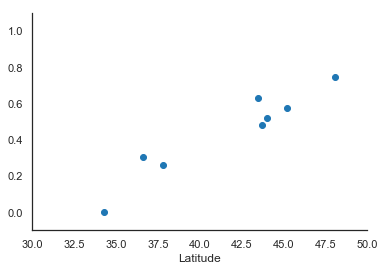

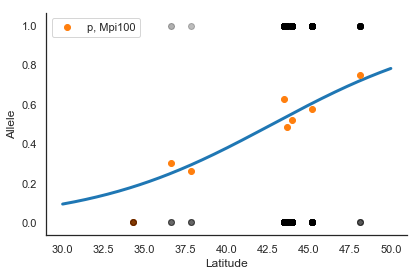

In [140]:


data = """Location	Latitude	Mpi90	Mpi100	p, Mpi100
Port Townsend, WA	48.1	47	139	0.748
Neskowin, OR	45.2	177	241	0.577
Siuslaw R., OR	44	1087	1183	0.521
Umpqua R., OR	43.7	187	175	0.483
Coos Bay, OR	43.5	397	671	0.628
San Francisco, CA	37.8	40	14	0.259
Carmel, CA	36.6	39	17	0.304
Santa Barbara, CA	34.3	30	0	0
"""
df = pd.read_table(io.StringIO(data))
df.head()

#	Location 	Latitude 	Mpi90 	Mpi100 	p, Mpi100
#0 	Port Townsend, WA 	48.1 	47 	139 	0.748
#1 	Neskowin, OR 	45.2 	177 	241 	0.577
#2 	Siuslaw R., OR 	44.0 	1087 	1183 	0.521
#3 	Umpqua R., OR 	43.7 	187 	175 	0.483
#4 	Coos Bay, OR 	43.5 	397 	671 	0.628

df.sort_values('Latitude').plot('Latitude', 'p, Mpi100', ls='', marker='o')
#plt.ylabel('Mpi100 proportion')
plt.legend().set_visible(False)
plt.xlim(30, 50)
plt.ylim(-0.1, 1.1)
sns.despine()

rows = []
for i, row in df.iterrows():
    for _ in range(row['Mpi90']):
        rows.append({'Location':row['Location'], 'Latitude': row['Latitude'], 'Allele': 0})
    for _ in range(row['Mpi100']):
        rows.append({'Location':row['Location'], 'Latitude': row['Latitude'], 'Allele': 1})
raw_df = pd.DataFrame(rows)
raw_df.head()

#	Allele 	Latitude 	Location
#0 	0 	48.1 	Port Townsend, WA
#1 	0 	48.1 	Port Townsend, WA
#2 	0 	48.1 	Port Townsend, WA
#3 	0 	48.1 	Port Townsend, WA
#4 	0 	48.1 	Port Townsend, WA

clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(raw_df['Latitude'].values.reshape(-1, 1), raw_df['Allele'])
print(clf.intercept_, clf.coef_)

#[-7.59881547] [[ 0.17754715]]

#which is very close to McDonald's intercept of -7.6469 and slope of 0.1786.

fig, ax = plot_log_reg(x='Latitude', y='Allele', data=raw_df, clf=clf, xmin=30, xmax=50, alpha=0.02)
df.sort_values('Latitude').plot('Latitude', 'p, Mpi100', ls='', marker='o', ax=ax)

#<matplotlib.axes._subplots.AxesSubplot at 0x7f8837430be0>

clf0 = log_reg_null_model(raw_df['Allele'])
print(clf0.intercept_, clf0.coef_)

#[ 0.19685284] [[ 0.]]

log_reg_lik_ratio_test(raw_df['Latitude'], raw_df['Allele'], clf0, clf)



In [141]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
method : {‘pearson’, ‘kendall’, ‘spearman’}

        pearson : standard correlation coefficient
        kendall : Kendall Tau correlation coefficient
        spearman : Spearman rank correlation '''


    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

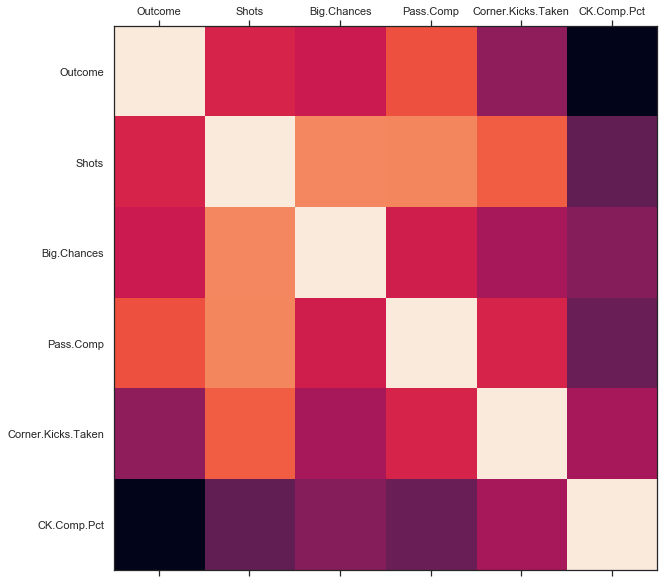

In [168]:
plot_corr(df2,size=10)

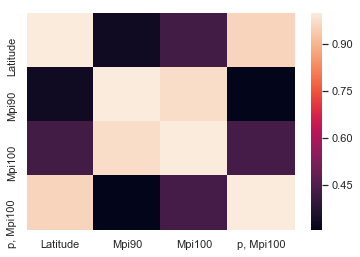

In [109]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

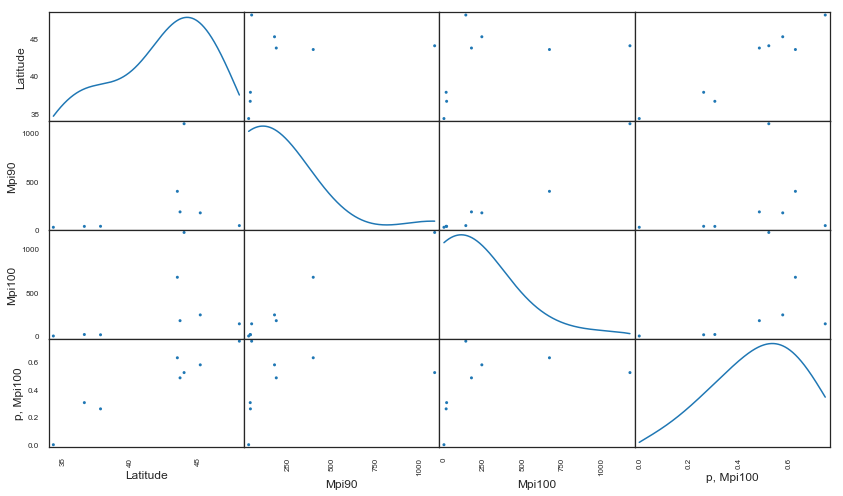

In [116]:

#From Pairplots: You can observe same set of relations from pairplots or scatter matrix. But from these we can say that whether the data is normally distributed or not. 

pd.plotting.scatter_matrix(df, alpha =1, figsize = (14,8), diagonal = 'kde');

In [124]:
rs = np.random.RandomState(0)

corr = df.corr()
corr.style.background_gradient().set_precision(2)


,Latitude,Mpi90,Mpi100,"p, Mpi100"
Latitude,1,0.33,0.43,0.96
Mpi90,0.33,1,0.97,0.3
Mpi100,0.43,0.97,1,0.43
"p, Mpi100",0.96,0.3,0.43,1
